Dataset do Kaggle: https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression

Aluno:

*   Thiago Fornelos Albuquerque (tfa@cesar.school)

#Libs

In [133]:
from google.colab import files
import pandas as pd
import numpy as np
import io
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ignorar warnings para uma melhor apresentação
import warnings
warnings.filterwarnings('ignore')


#Carregamento

In [134]:
uploaded_file = files.upload()

Saving Salary_dataset.csv to Salary_dataset (4).csv


In [135]:
df = pd.read_csv('Salary_dataset.csv')

In [136]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [138]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [139]:
df['YearsExperience'].isnull().sum()

np.int64(0)

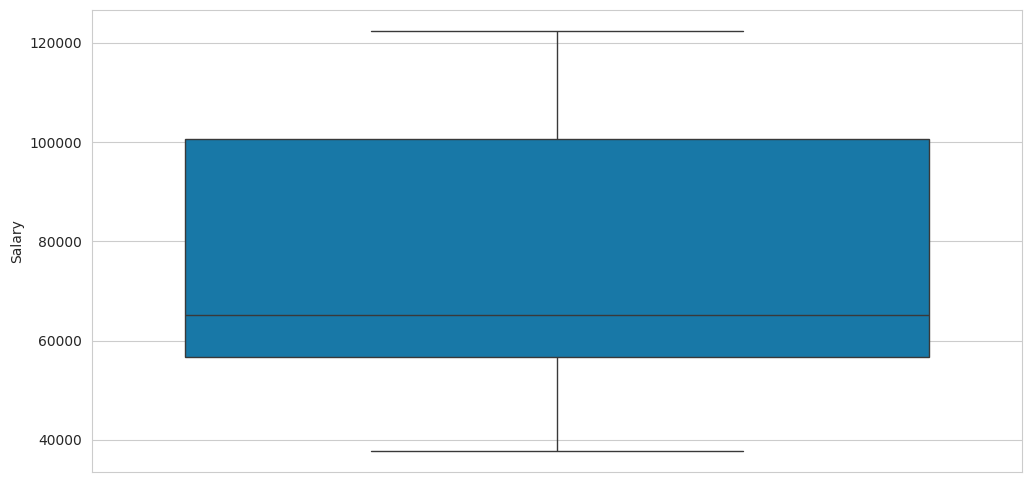

In [140]:

ax = sns.boxplot(data=df['Salary'], palette='winter')
ax.figure.set_size_inches(12, 6)


<Axes: xlabel='Salary', ylabel='Count'>

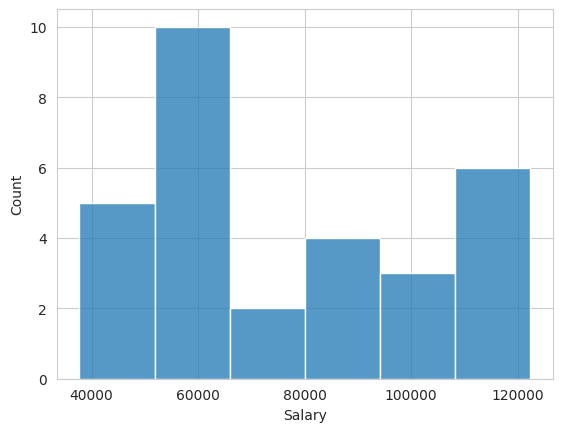

In [141]:
sns.histplot(data=df['Salary'])

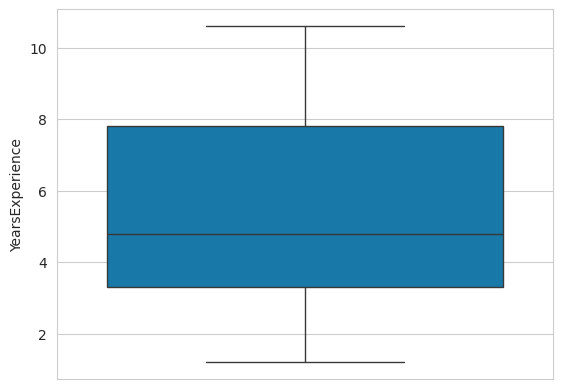

In [142]:
sns.boxplot(data=df['YearsExperience'],palette='winter')
ax.figure.set_size_inches(12, 6)

<Axes: xlabel='YearsExperience', ylabel='Count'>

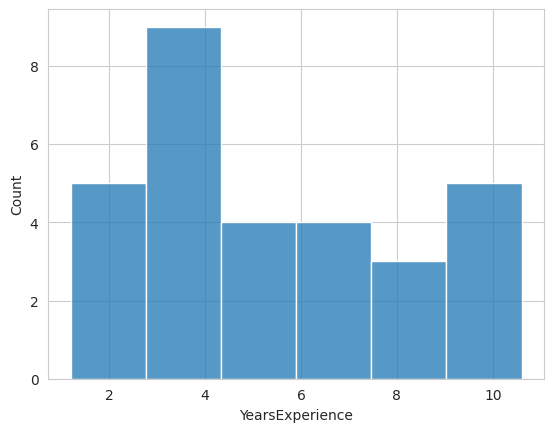

In [143]:
sns.histplot(data=df['YearsExperience'])

#Pré-processamento e Feature Engineering

In [144]:
df = df.drop(columns=['Unnamed: 0'])

In [145]:
X = df[["YearsExperience"]].values
y = df["Salary"].values

In [146]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [147]:
# Exibindo o tamanho dos conjuntos para confirmar a divisão
print(f"Tamanho do conjunto de Treino (X_train): {X_train.shape}")
print(f"Tamanho do conjunto de Teste (X_test): {X_test.shape}")

Tamanho do conjunto de Treino (X_train): (24, 1)
Tamanho do conjunto de Teste (X_test): (6, 1)


In [148]:
modelo = LinearRegression()

In [149]:
modelo.fit(X_train, y_train)

LinearRegression()

In [150]:
y_pred = modelo.predict(X_test)

In [151]:
#CÁLCULO DAS MÉTRICAS
#R2 SCORE
score = r2_score(y_test,y_pred)
print("R2 Score: ", score)

#MEAN ABSOLUTE ERROR:
mae = mean_absolute_error(y_test,y_pred)
print("MAE: ", mae)

#MEAN SQUARED ERROR:
mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)

#RMSE (Raiz Quadrada do MSE)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")


R2 Score:  0.9024461774180497
MAE:  6286.453830757745
MSE: 49830096.855908394
RMSE: 7059.04
